In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Прогнозирование инсульта
## Основываясь на 11 клинических особенностях для прогнозирования, предсказать вероятность инсульта.
### Чтение данных

In [30]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',', header=0,  engine='python')
type(data)

pandas.core.frame.DataFrame

In [31]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Рассматриваемые признаки
1. id
2. Age - возраст пациента;
3. Hypertension - синдром повышения систолического артериального давления (САД) от 140 мм рт. ст. и выше, и одновременно или самостоятельно — диастолического АД (ДАД) ≥ 90 мм рт. ст.;
4. heart_disease - наличие болезней, связанных с сердцем;
5. ever_married - состоял ли человек в браке;
6. work_type - тип работы, которой занимался(занимается) пациент;
7. Residence_type - тип жилья, в котором жил(живет) пациент;
8. avg_glucose_level - уровень глюкозы в крови;
9. bmi - индекс массы тела;
10. smoking_status - отношение человека к курению;
11. stroke - акт инсульта.

## Визуализация данных

In [32]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Диаграмма разброса

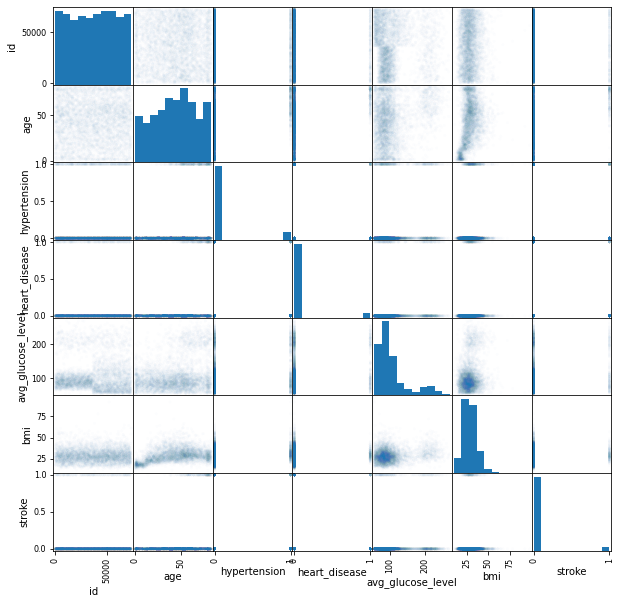

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

### Матрица корреляции

In [34]:
corr_mat = data.corr()
corr_mat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


### Разнородность классов

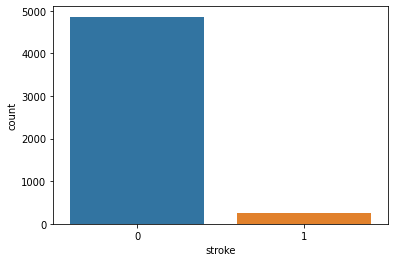

In [35]:
sns.countplot(x='stroke', data=data)
pass

### Визуализация матрицы корреляции

<AxesSubplot:>

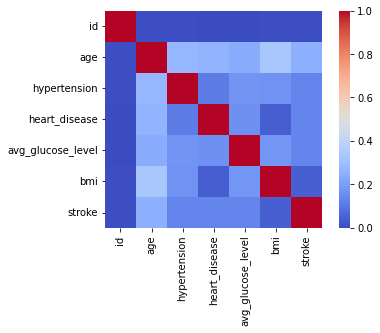

In [36]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Можно увидеть, что признаки практически не коррелируют между собой и большей степени являются независимыми.

## Обработка пропущенных значений

In [37]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Находим категориальные признаки

In [38]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)
data.shape

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


(5110, 12)

In [39]:
data.dropna(axis = 0).shape

(4909, 12)

Есть пропущенные значения. Заполняем медианными значениями

In [40]:
data = data.fillna(data.median(axis = 0, numeric_only=True), axis = 0)
data.shape

(5110, 12)

### Векторизируем данные

In [41]:
data_describe = data.describe(include = [object])

Векторизация бинарных данных

In [42]:
data.at[data['ever_married'] == 'No', 'ever_married'] = 0
data.at[data['ever_married'] == 'Yes', 'ever_married'] = 1
data['ever_married'].describe()

data.at[data['Residence_type'] == 'Urban', 'Residence_type'] = 0
data.at[data['Residence_type'] == 'Rural', 'Residence_type'] = 1
data['Residence_type'].describe()

for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])
data.describe(include = [object])

binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


### Нормализация 

In [43]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [44]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-1.168015e-16,3.893385e-17,2.780989e-18,3.615286e-17,1.001156e-16,-4.171484e-17,6.674374e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.722489e+00,-1.908074e+00,-3.285697e-01,-2.389234e-01,-1.126848e+00,-2.410791e+00,-2.263051e-01
25%,-8.872898e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-6.382598e-01,-6.574445e-01,-2.263051e-01
50%,1.957169e-02,7.842450e-02,-3.285697e-01,-2.389234e-01,-3.149637e-01,-9.897124e-02,-2.263051e-01
75%,8.583503e-01,7.859932e-01,-3.285697e-01,-2.389234e-01,1.753909e-01,5.114531e-01,-2.263051e-01
max,1.721135e+00,1.714677e+00,3.042899e+00,4.184622e+00,3.656787e+00,8.927516e+00,4.417948e+00


### Соединяем все в матрицу

In [45]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(5110, 21)


In [46]:
data.isna().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
ever_married                      0
Residence_type                    0
dtype: int64

Видно, что пропусков не осталось

In [47]:
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married,Residence_type
0,-1.298185,1.051331,-0.328570,4.184622,2.706111,1.004988,4.417948,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0.716301,0.785993,-0.328570,-0.238923,2.121351,-0.098971,4.417948,1,0,0,...,0,0,1,0,0,0,1,0,1,1
2,-0.255453,1.626231,-0.328570,4.184622,-0.005028,0.472490,4.417948,0,1,0,...,0,1,0,0,0,0,1,0,1,1
3,1.118254,0.255317,-0.328570,-0.238923,1.437217,0.719257,4.417948,1,0,0,...,0,1,0,0,0,0,0,1,1,0
4,-1.646975,1.582008,3.042899,-0.238923,1.501038,-0.631469,4.417948,1,0,0,...,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.864005,1.626231,3.042899,-0.238923,-0.494609,-0.098971,-0.226305,1,0,0,...,0,1,0,0,0,0,1,0,1,0
5106,0.394825,1.670454,-0.328570,-0.238923,0.420734,1.446571,-0.226305,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5107,-0.793642,-0.363806,-0.328570,-0.238923,-0.511393,0.225723,-0.226305,1,0,0,...,0,0,1,0,0,0,1,0,1,1
5108,0.048492,0.343763,-0.328570,-0.238923,1.328127,-0.423665,-0.226305,0,1,0,...,0,1,0,0,0,1,0,0,1,1


## Разбиение данных на обучающую и тестовую выборки

In [48]:
X = data.drop('stroke', axis = 1) # выбрасываем столбец 'class'
y = data['stroke']
X = X.to_numpy()
y = y.to_numpy(dtype='int32')



In [49]:
y

array([4, 4, 4, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

3577 1533


## Классификатор ближайших соседей

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [53]:
err_test

0.060665362035225046

In [54]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1440    4]
 [  89    0]]


### Подбираем параметры для уменьшения ошибки

In [55]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("best_cv_err: ", best_cv_err)
print("best_n_neighbors: ", best_n_neighbors)

best_cv_err:  0.04473029435237774
best_n_neighbors:  15


In [56]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("err_train: ", err_train)
print("err_test: ", err_test)

err_train:  0.04473022085546548
err_test:  0.05805609915198956


## Выводы

В ходе данной лабораторной работы были рассмотрены визуализация данных и вычисление основных характеристик, обработка пропущенные значений, векторизация категориальных признаков, нормализация и разбиение на обучающую и тестовую выборки. Для решения задачи классификации использовался метод ближайших соседей(kNN). Минимальная ошибка получилась при использовании 15 ближайших соседей. При таком наборе признаков задача классификации решается с малой ошибкой методом kNN.